In [14]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Read the dataset

data = pd.read_csv('IMDB Dataset.csv')
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [15]:
# lowercase

data['review'] = data['review'].apply(str.lower)
print(data.head())

                                              review sentiment
0  one of the other reviewers has mentioned that ...  positive
1  a wonderful little production. <br /><br />the...  positive
2  i thought this was a wonderful way to spend ti...  positive
3  basically there's a family where a little boy ...  negative
4  petter mattei's "love in the time of money" is...  positive


In [16]:
# remove numbers

data['review'] = data['review'].apply(lambda x: re.sub(r'\d+', '', x))
print(data.head())


                                              review sentiment
0  one of the other reviewers has mentioned that ...  positive
1  a wonderful little production. <br /><br />the...  positive
2  i thought this was a wonderful way to spend ti...  positive
3  basically there's a family where a little boy ...  negative
4  petter mattei's "love in the time of money" is...  positive


In [17]:
# remove punctuation

data['review'] = data['review'].apply(lambda x: re.sub(r'[^\w\s]', '', x))
print(data.head())

                                              review sentiment
0  one of the other reviewers has mentioned that ...  positive
1  a wonderful little production br br the filmin...  positive
2  i thought this was a wonderful way to spend ti...  positive
3  basically theres a family where a little boy j...  negative
4  petter matteis love in the time of money is a ...  positive


In [18]:
# remove whitespaces

data['review'] = data['review'].str.split().apply(' '.join)
print(data.head())

                                              review sentiment
0  one of the other reviewers has mentioned that ...  positive
1  a wonderful little production br br the filmin...  positive
2  i thought this was a wonderful way to spend ti...  positive
3  basically theres a family where a little boy j...  negative
4  petter matteis love in the time of money is a ...  positive


In [ ]:
#tokenize words
data['review'] = data['review'].astype(str)

def tokenize_words(text):
    tokens = word_tokenize(text)
    return tokens

data['review'] = data['review'].apply(tokenize_words)
display(data.head())

In [19]:
# splitting the review data into train and test
data['review'] = data['review'].apply(' '.join)

# train dataset
train_reviews = data.review[:40000]

# test dataset
test_reviews = data.review[40000:]

print(train_reviews.shape)
print(test_reviews.shape)
print(train_reviews[:10])

(40000,)
(10000,)
0    one of the other reviewers has mentioned that ...
1    a wonderful little production br br the filmin...
2    i thought this was a wonderful way to spend ti...
3    basically theres a family where a little boy j...
4    petter matteis love in the time of money is a ...
5    probably my alltime favorite movie a story of ...
6    i sure would like to see a resurrection of a u...
7    this show was an amazing fresh innovative idea...
8    encouraged by the positive comments about this...
9    if you like original gut wrenching laughter yo...
Name: review, dtype: object


In [20]:
# FastText vectorization
vectorizer = TfidfVectorizer(min_df=0, max_df=1, ngram_range=(1,3))

ft_train_reviews = vectorizer.fit_transform(train_reviews)
ft_test_reviews = vectorizer.transform(test_reviews)

print('FastText_train:', ft_train_reviews.shape)
print('FastText_test:', ft_test_reviews.shape)

FastText_train: (40000, 6418464)
FastText_test: (10000, 6418464)


In [21]:
# Labeling the sentiment data

lb = LabelBinarizer()
sentiment_data = lb.fit_transform(data['sentiment'])
print(sentiment_data.shape)

(50000, 1)


In [22]:
# Splitting the sentiment data into train and test

test_sentiments = data.sentiment[40000:]
print(test_sentiments.shape)
train_sentiments = data.sentiment[:40000]
print(train_sentiments.shape)

(10000,)
(40000,)


In [30]:
# Training the model logistic regression
lr_ft = LogisticRegression(penalty='l2', max_iter=500, C=1, random_state=42)
lr_ft.fit(ft_train_reviews, train_sentiments)
lr_ft_predict = lr_ft.predict(ft_test_reviews)
lr_ft_score = accuracy_score(test_sentiments, lr_ft_predict)

print("lr_ft_score :", lr_ft_score)

lr_ft_report = classification_report(test_sentiments, lr_ft_predict, target_names=['Positive', 'Negative'])
print(lr_ft_report)

lr_ft_score : 0.7648
              precision    recall  f1-score   support

    Positive       0.75      0.79      0.77      4993
    Negative       0.78      0.74      0.76      5007

    accuracy                           0.76     10000
   macro avg       0.77      0.76      0.76     10000
weighted avg       0.77      0.76      0.76     10000



In [27]:
# Training the model SVM

svm_ft = SGDClassifier(loss='hinge', max_iter=1000, random_state=42)
svm_ft.fit(ft_train_reviews, train_sentiments)
svm_ft_predict = svm_ft.predict(ft_test_reviews)
svm_ft_score = accuracy_score(test_sentiments, svm_ft_predict)

print("svm_ft_score :", svm_ft_score)

svm_ft_report = classification_report(test_sentiments, svm_ft_predict, target_names=['Positive', 'Negative'])
print(svm_ft_report)

svm_ft_score : 0.5111
              precision    recall  f1-score   support

    Positive       1.00      0.02      0.04      4993
    Negative       0.51      1.00      0.67      5007

    accuracy                           0.51     10000
   macro avg       0.75      0.51      0.36     10000
weighted avg       0.75      0.51      0.36     10000



In [25]:
# Convert the train and test data to text format
train_text = ' '.join(train_reviews)
test_text = ' '.join(test_reviews)

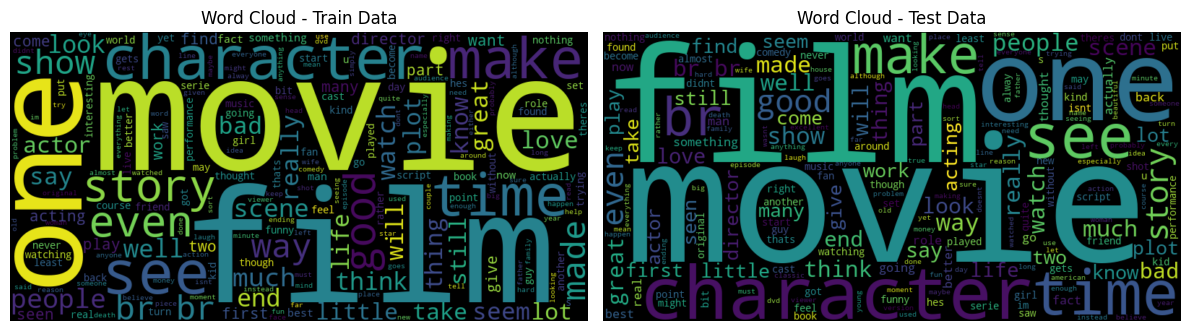

In [26]:
# Create a word cloud for the train data
wordcloud_train = WordCloud(width=800, height=400).generate(train_text)

# Create a word cloud for the test data
wordcloud_test = WordCloud(width=800, height=400).generate(test_text)

# Plot the word clouds
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_train, interpolation='bilinear')
plt.title('Word Cloud - Train Data')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_test, interpolation='bilinear')
plt.title('Word Cloud - Test Data')
plt.axis('off')

plt.tight_layout()
plt.show()